[*********************100%***********************]  1 of 1 completed


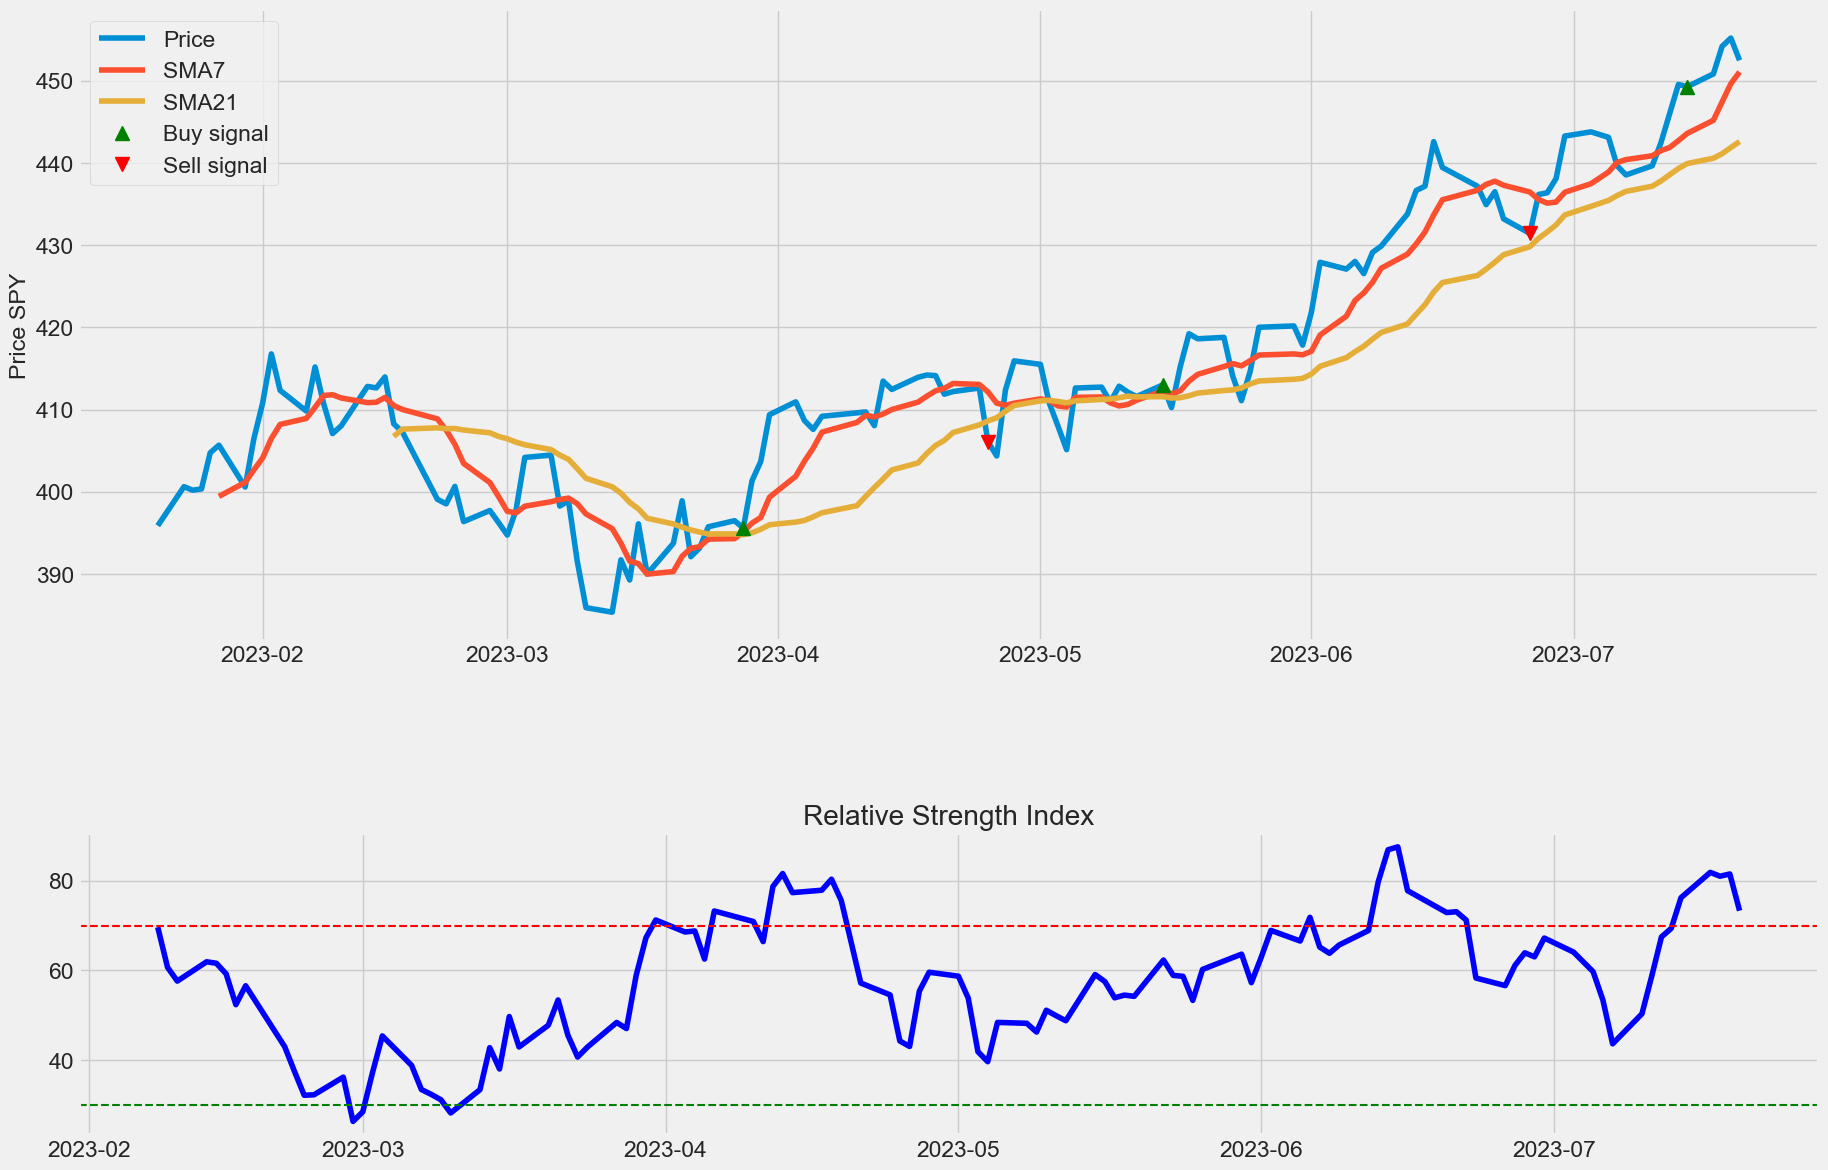

[*********************100%***********************]  1 of 1 completed


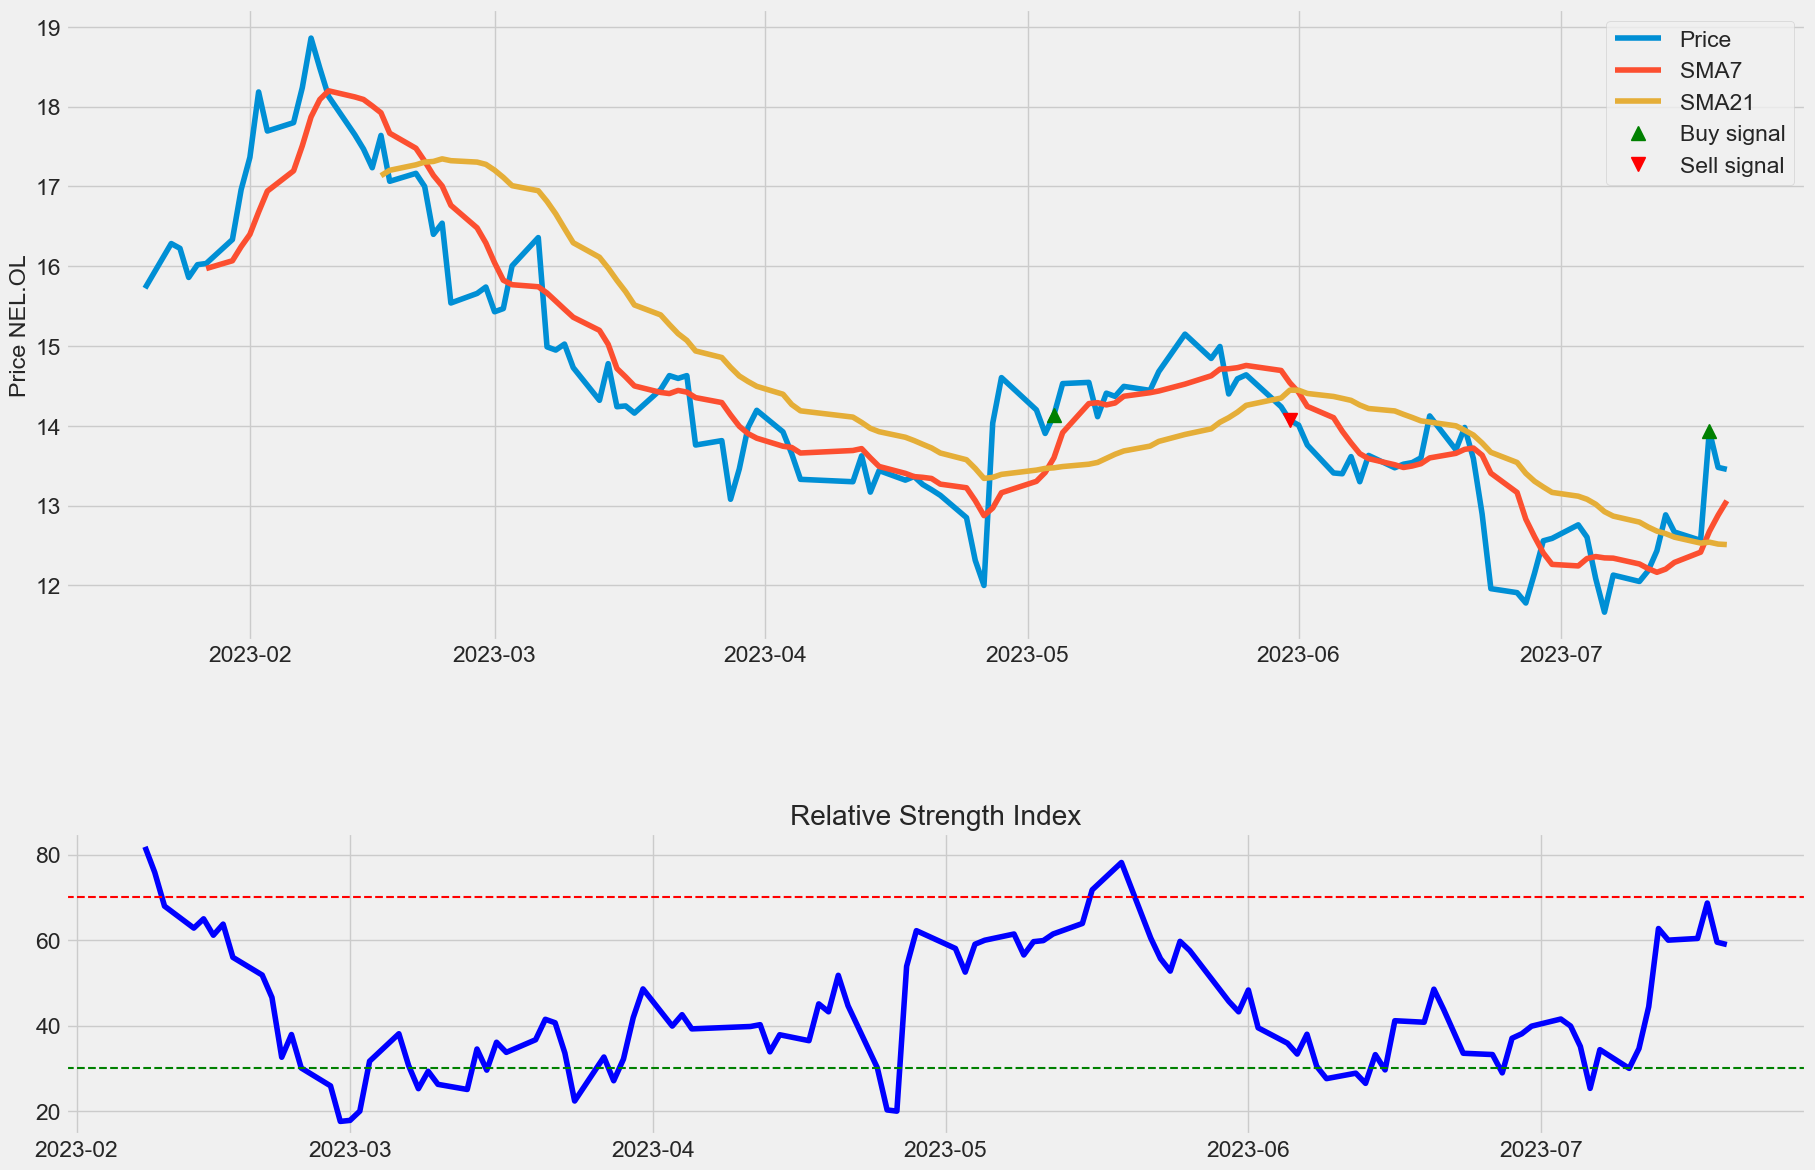

[*********************100%***********************]  1 of 1 completed


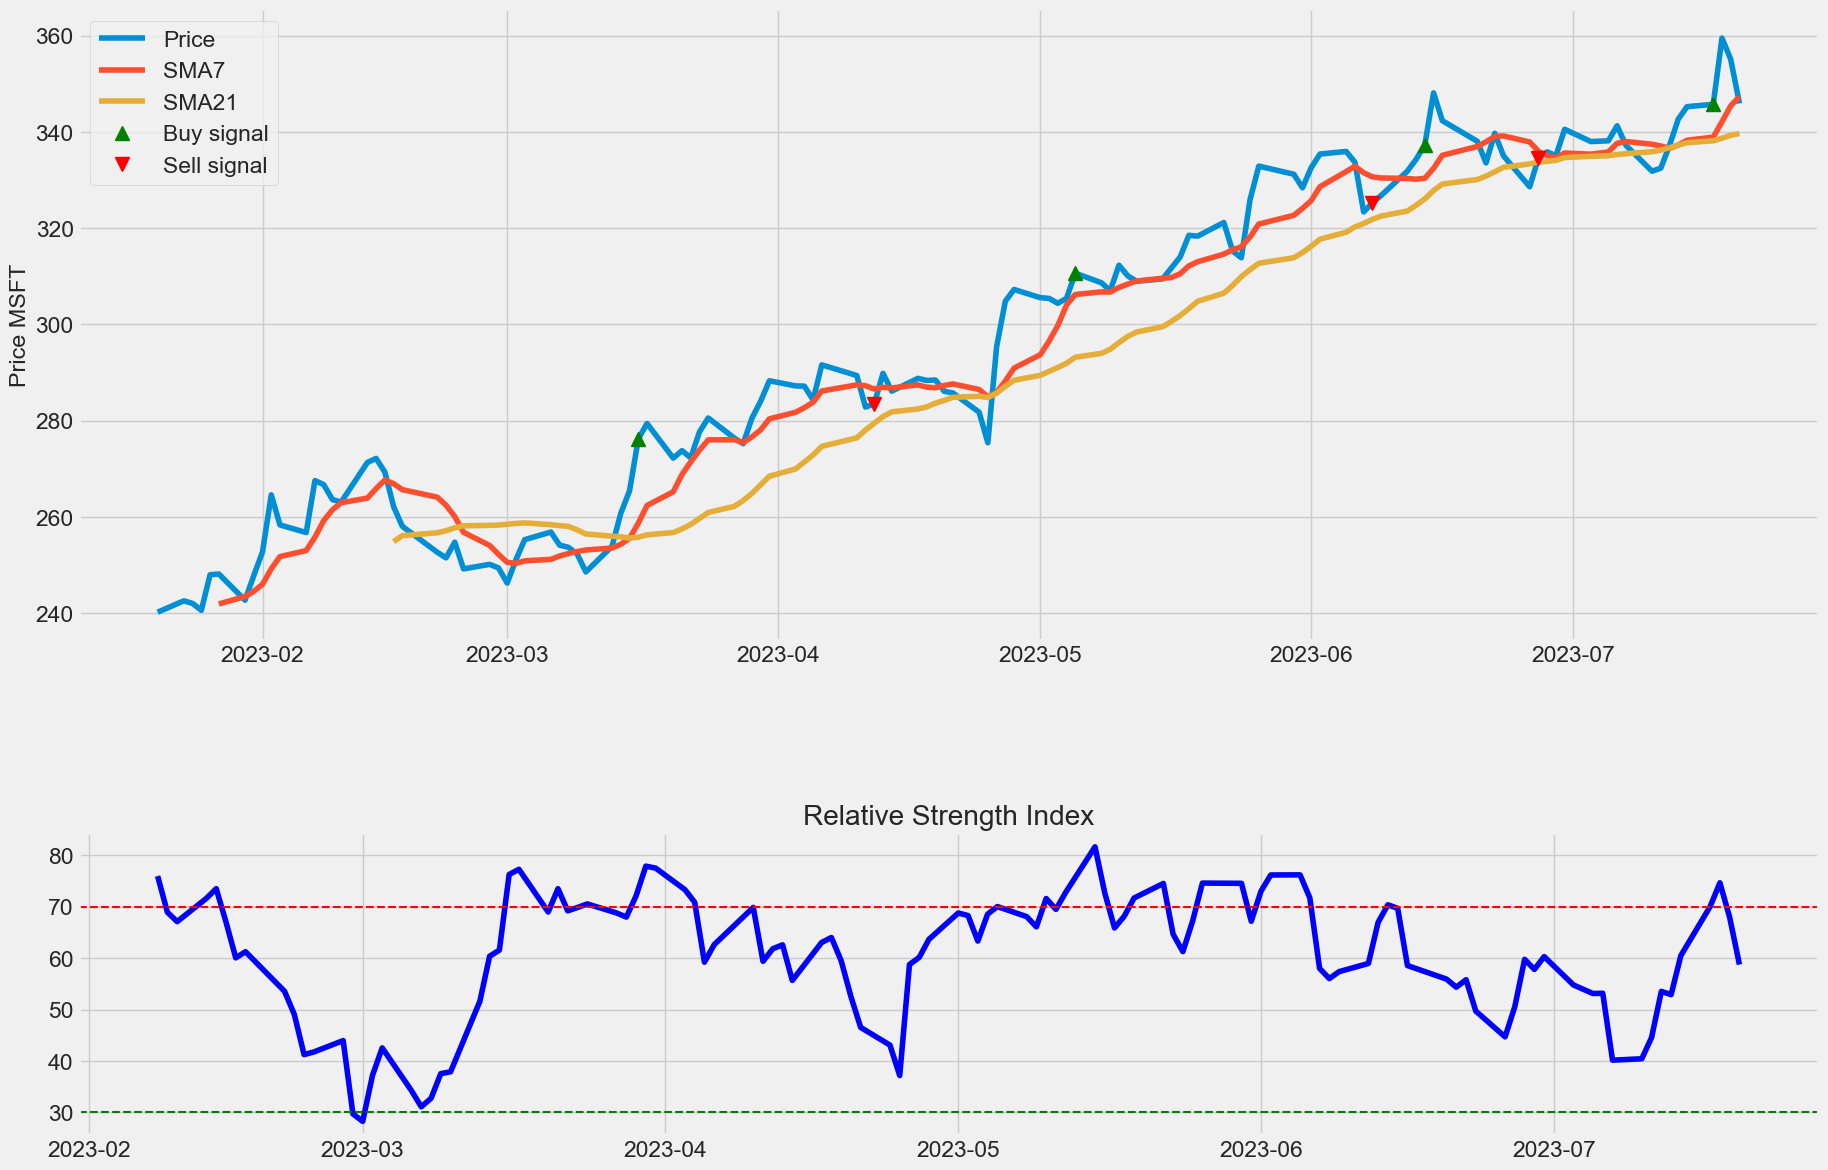

In [17]:
import yfinance as yf 
import streamlit as st
import pandas as pd
from datetime import datetime , timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

tickers = ['SPY', 'NEL.OL', 'MSFT']
end_date= datetime.today()
start_date = end_date - timedelta(days = 0.5*365)

st.title('Stock RSI and SMA signals')

for ticker in tickers:
    ticker_shortrolling= 't_short'
    ticker_longrolling= 't_long'
    t = yf.download(ticker, start = start_date, end = end_date)
    t = pd.DataFrame(t).drop(['High', 'Open', 'Low', 'Adj Close', 'Volume'], axis=1)
    
    
    t["SMA7"]= t["Close"].rolling(window=7).mean()
    t["SMA21"]= t["Close"].rolling(window=21).mean()

    #---------------------------# 
    #calculating the RSI rolling 14 days
    t['change'] = t["Close"].diff()

    # Create two copies of the Closing price Series
    change_up = t['change'].copy()
    change_down = t['change'].copy()

    # 
    change_up[change_up<0] = 0
    change_down[change_down>0] = 0

    # Verify that we did not make any mistakes
    #change.equals(change_up+change_down)

    avg_up = change_up.rolling(14).mean()
    avg_down = change_down.rolling(14).mean().abs()

    t['rsi'] = 100 * avg_up / (avg_up + avg_down)

        # output /Plot
    # SMAs and close
    plt.style.use('fivethirtyeight')
    #fig, ax = plt.subplots(figsize=(16,9))
    plt.rcParams['figure.figsize'] = (20, 20)
    ax = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
    ax1 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1)


    ax.plot(t.loc[start_date:end_date, :].index, t.loc[start_date:end_date, 'Close'], label='Price')
    ax.plot(t.loc[start_date:end_date, :].index, t.loc[start_date:end_date, 'SMA7'], label='SMA7')
    ax.plot(t.loc[start_date:end_date, :].index, t.loc[start_date:end_date, 'SMA21'], label='SMA21')

    # Signals Buy if (SMA7 today is larger than todays SMA21 and for the last two days in addition to SMA short is going up) or() SMA7 today is larger than todays SMA21 and for the last two days in addition to SMA long is going down)! 
    # Also buy if RSI is larger than 70%
    # Signals Sell if 
    sma_long=t['SMA21']
    sma_short=t['SMA7']
    rsi=t['rsi']
    signals = [None]*len(sma_short)
    current_signal=''
    for i in range(1, len(sma_short)):
        if current_signal == 'Sell' and rsi[i] > 70 :
            signals[i] = 'Buy'
            current_signal = 'Buy'

        elif (sma_short[i] > sma_long[i] and sma_short[i-1] <= sma_long[i-1] and sma_short[i-2] <= sma_long[i-2] and sma_short[i]>sma_short[i-1]>sma_short[i-2]) or (sma_short[i] > sma_long[i] and sma_short[i-1] <= sma_long[i-1] and sma_short[i-2] <= sma_long[i-2] and sma_long[i]<sma_long[i-1]<sma_long[i-2]):
            signals[i] = 'Buy'
            current_signal = 'Buy'

        elif current_signal == 'Buy' and rsi[i] < 30:
            signals[i] = 'Sell'
            current_signal ='Sell'

        elif current_signal=='Buy' and sma_short[i]<sma_short[i-1]<sma_short[i-2]:
            signals[i] = 'Sell'
            current_signal ='Sell'



    t['Signal'] = signals

    buy_points = t[t['Signal'] == 'Buy']
    sell_points = t[t['Signal'] == 'Sell']
    ax.plot(buy_points.index, buy_points['Close'], '^', markersize=10, color='g', label='Buy signal')
    ax.plot(sell_points.index, sell_points['Close'], 'v', markersize=10, color='r', label='Sell signal')

    # legend and y labeling

    ax.legend(loc='best')
    ax.set_ylabel('Price {}'.format(ticker))









    #Plott RSI
    plt.style.use('fivethirtyeight')
    #fig1, ax1 = plt.subplots(figsize=(16,9))

    # Plot the RSI
    ax1.set_title('Relative Strength Index')
    ax1.plot(t['rsi'], color='blue')

    # Add two horizontal lines, signalling the buy and sell ranges.
    # Oversold
    ax1.axhline(30, linestyle='--', linewidth=1.5, color='green')
    # Overbought
    ax1.axhline(70, linestyle='--', linewidth=1.5, color='red')
    plt.show()
    


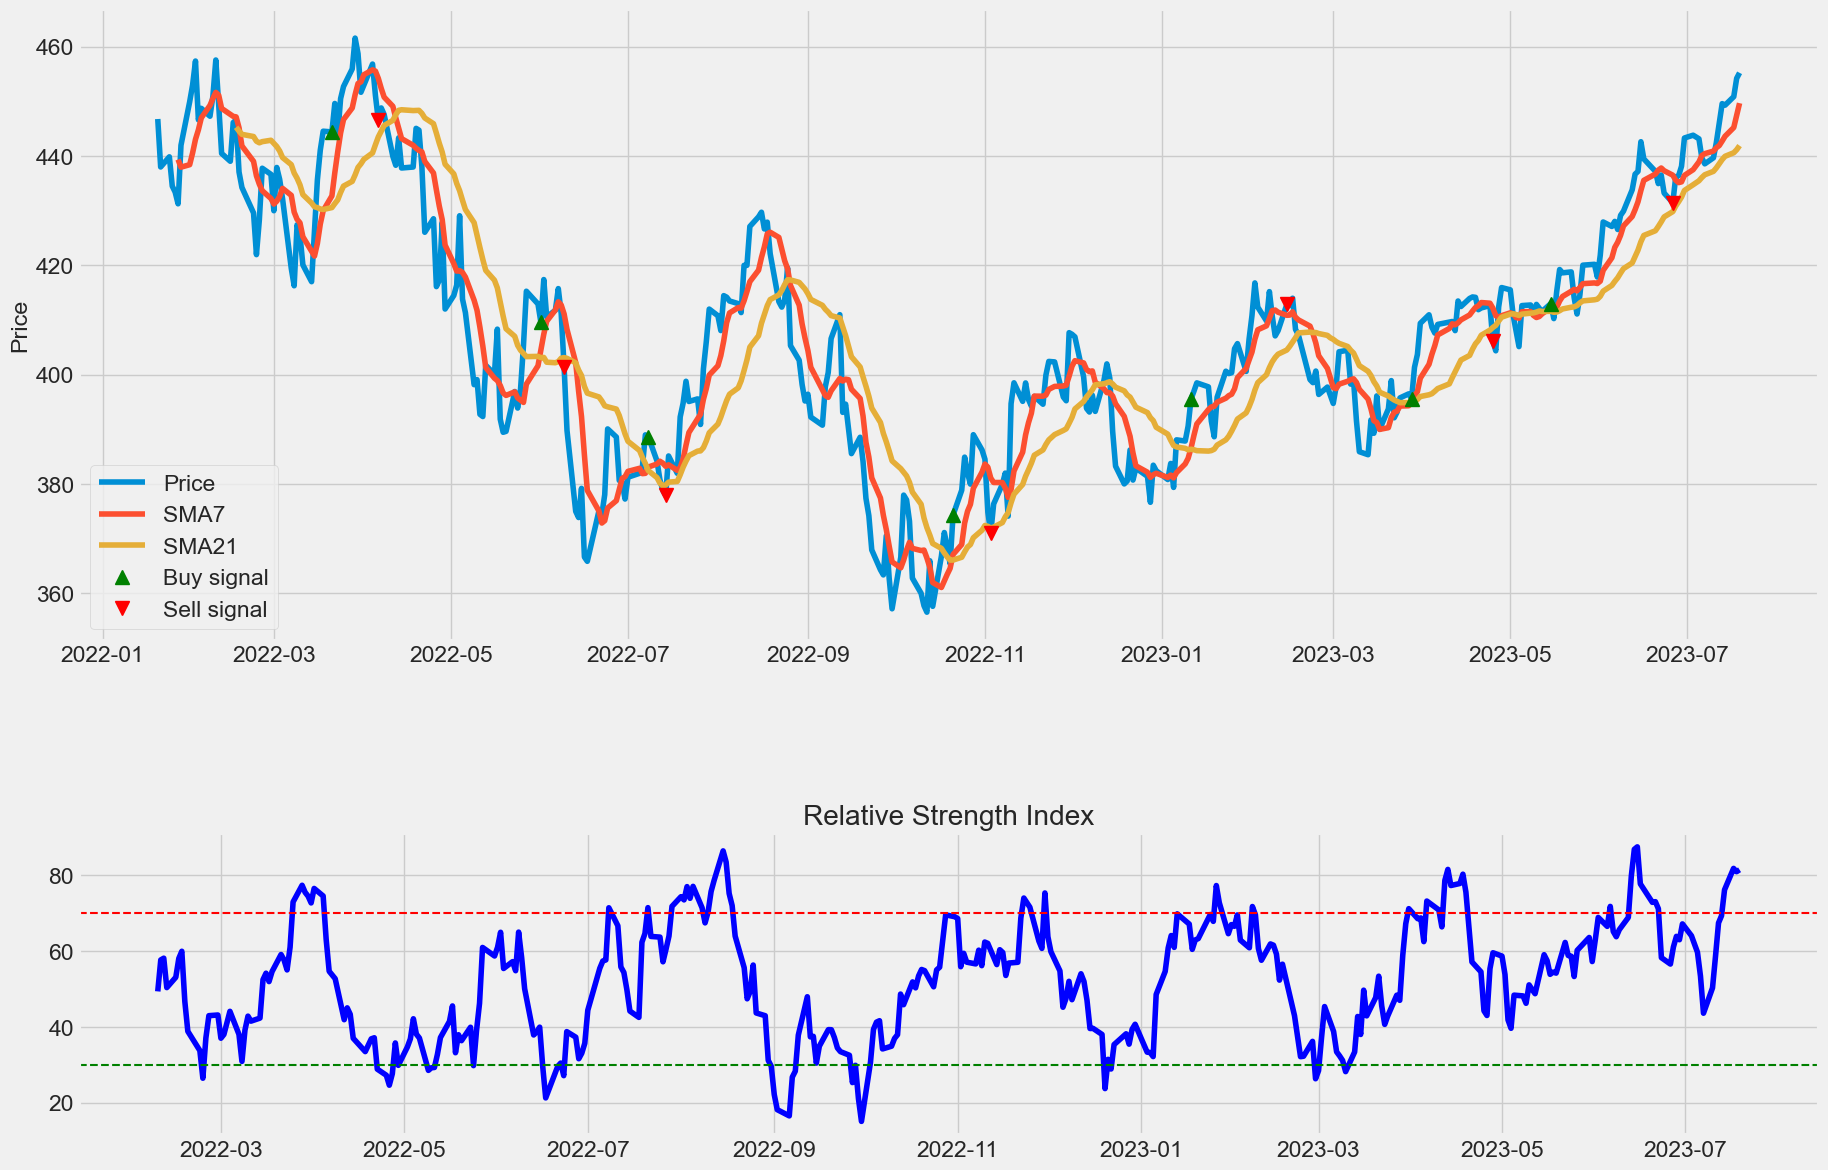

In [134]:
# output /Plot
# SMAs and close
plt.style.use('fivethirtyeight')
#fig, ax = plt.subplots(figsize=(16,9))
plt.rcParams['figure.figsize'] = (20, 20)
ax = plt.subplot2grid((10,1), (0,0), rowspan = 4, colspan = 1)
ax1 = plt.subplot2grid((10,1), (5,0), rowspan = 2, colspan = 1)


ax.plot(SPY.loc[start_date:end_date, :].index, SPY.loc[start_date:end_date, 'Close'], label='Price')
ax.plot(SPY.loc[start_date:end_date, :].index, SPY.loc[start_date:end_date, 'SMA7'], label='SMA7')
ax.plot(SPY.loc[start_date:end_date, :].index, SPY.loc[start_date:end_date, 'SMA21'], label='SMA21')

# Signals Buy if (SMA7 today is larger than todays SMA21 and for the last two days in addition to SMA short is going up) or() SMA7 today is larger than todays SMA21 and for the last two days in addition to SMA long is going down)! 
# Signals Sell if 
sma_long=SPY['SMA21']
sma_short=SPY['SMA7']
signals = [None]*len(sma_short)
current_signal=''
for i in range(1, len(sma_short)):
    

    if (sma_short[i] > sma_long[i] and sma_short[i-1] <= sma_long[i-1] and sma_short[i-2] <= sma_long[i-2] and sma_short[i]>sma_short[i-1]>sma_short[i-2]) or (sma_short[i] > sma_long[i] and sma_short[i-1] <= sma_long[i-1] and sma_short[i-2] <= sma_long[i-2] and sma_long[i]<sma_long[i-1]<sma_long[i-2]):
        signals[i] = 'Buy'
        current_signal = 'Buy'


    elif current_signal=='Buy' and sma_short[i]<sma_short[i-1]<sma_short[i-2]:
        signals[i] = 'Sell'
        current_signal ='Sell'



SPY['Signal'] = signals

buy_points = SPY[SPY['Signal'] == 'Buy']
sell_points = SPY[SPY['Signal'] == 'Sell']
ax.plot(buy_points.index, buy_points['Close'], '^', markersize=10, color='g', label='Buy signal')
ax.plot(sell_points.index, sell_points['Close'], 'v', markersize=10, color='r', label='Sell signal')

# legend and y labeling

ax.legend(loc='best')
ax.set_ylabel('Price')


#calculating the RSI rolling 14 days
change = SPY["Close"].diff()
change.dropna(inplace=True)

# Create two copies of the Closing price Series
change_up = change.copy()
change_down = change.copy()

# 
change_up[change_up<0] = 0
change_down[change_down>0] = 0

# Verify that we did not make any mistakes
change.equals(change_up+change_down)

avg_up = change_up.rolling(14).mean()
avg_down = change_down.rolling(14).mean().abs()

rsi = 100 * avg_up / (avg_up + avg_down)


#Plott
plt.style.use('fivethirtyeight')
#fig1, ax1 = plt.subplots(figsize=(16,9))

# Plot the RSI
ax1.set_title('Relative Strength Index')
ax1.plot(rsi, color='blue')

# Add two horizontal lines, signalling the buy and sell ranges.
# Oversold
ax1.axhline(30, linestyle='--', linewidth=1.5, color='green')
# Overbought
ax1.axhline(70, linestyle='--', linewidth=1.5, color='red')